<h1> Projected Related Links </h1> <br>

Blog Post Link : https://medium.com/@durgapramodh10dj95/image-classification-for-natural-images-1c10f88a7f25 <br>

Kaggle :   https://www.kaggle.com/code/durgapramodhkumar/natural-image-classifier/edit <br>

Youtube :  https://www.youtube.com/watch?v=-9YxtILcoBY&list=PLXAH5ULJEZfjw_TGWqnbZFCUtDseBmvkF <br>

Github_Links : <br>

Backend- ipynb: https://github.com/dj1095/natural-image-classifier/blob/master/natural-image-classifier.ipynb <br>

UI: https://github.com/dj1095/natural-image-classifier-flask <br>
 

# Image Classifier

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import time
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
#test train data split 

splitfolders.ratio("./data/natural_images/", output="output", seed=1337, ratio=(.8, .1,.1), group_prefix=None)

Copying files: 6899 files [00:12, 550.94 files/s]


In [3]:
#Define Image Transforms
training_transforms = transforms.Compose([transforms.RandomRotation(30),
                                          transforms.RandomResizedCrop(150),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406], 
                                                               [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(175),
                                            transforms.CenterCrop(150),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], 
                                                                 [0.229, 0.224, 0.225])])

testing_transforms = transforms.Compose([transforms.Resize(175),
                                         transforms.CenterCrop(150),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], 
                                                              [0.229, 0.224, 0.225])])

#Hyper Parameters
batch_size = 32
learning_rate = 0.001

traindataset = datasets.ImageFolder('./output/train', transform=training_transforms)
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=batch_size,shuffle=True)

valdataset = datasets.ImageFolder('./output/val', transform=validation_transforms)
valloader = torch.utils.data.DataLoader(valdataset, batch_size=batch_size, shuffle=True)

testdataset = datasets.ImageFolder('./output/test', transform=testing_transforms)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=batch_size, shuffle=True)



classes = ('Airplane','Car','Cat','Dog','Flower','Fruit','Motorbike','Person')

In [4]:
len(traindataset)

5516

In [5]:
len(valdataset)

686

In [6]:
len(testdataset)

697

<h3>Class and Indexes</h3>

In [7]:
pd.DataFrame(traindataset.class_to_idx.items(), columns=['Class', 'Index_allocated'])

,Class,Index_allocated
0,airplane,0
1,car,1
2,cat,2
3,dog,3
4,flower,4
5,fruit,5
6,motorbike,6
7,person,7


<h3>Sample Images from Dataset<h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


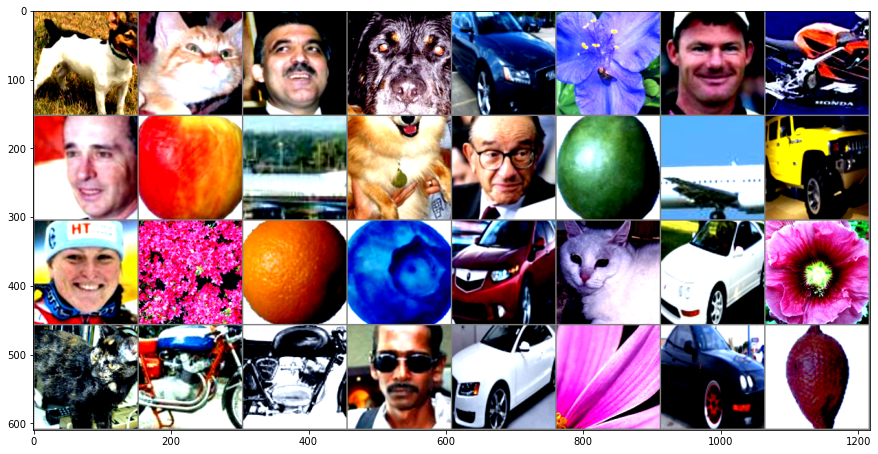

Dog   Cat   Person Dog   Car   Flower Person Motorbike Person Fruit Airplane Dog   Person Fruit Airplane Car   Person Flower Fruit Fruit Car   Cat   Car   Flower Cat   Motorbike Motorbike Person Car   Flower Car   Fruit


In [8]:
# functions to show an image
plt.rcParams["figure.figsize"] = (15,15)
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

<h3>Defining CNN Models</h3>

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(9248, 256)
        self.fc2 = nn.Linear(256, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

<h3>Loss Function</h3>

In [10]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [11]:
def get_accuracy(dataloader,model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return round(correct/total,3)

Epoch [1/15], Step [173/173], Time taken:[104.029 seconds], Loss: 2.4560
Epoch [2/15], Step [173/173], Time taken:[75.329 seconds], Loss: 2.0260
Epoch [3/15], Step [173/173], Time taken:[77.336 seconds], Loss: 1.8470
Epoch [4/15], Step [173/173], Time taken:[73.674 seconds], Loss: 1.7660
Epoch [5/15], Step [173/173], Time taken:[82.679 seconds], Loss: 1.6860
Epoch [6/15], Step [173/173], Time taken:[77.432 seconds], Loss: 1.6510
Epoch [7/15], Step [173/173], Time taken:[93.95 seconds], Loss: 1.6140
Epoch [8/15], Step [173/173], Time taken:[79.779 seconds], Loss: 1.5890
Epoch [9/15], Step [173/173], Time taken:[88.498 seconds], Loss: 1.5630
Epoch [10/15], Step [173/173], Time taken:[77.177 seconds], Loss: 1.5440
Epoch [11/15], Step [173/173], Time taken:[77.654 seconds], Loss: 1.5100
Epoch [12/15], Step [173/173], Time taken:[79.607 seconds], Loss: 1.4910
Epoch [13/15], Step [173/173], Time taken:[82.506 seconds], Loss: 1.5000
Epoch [14/15], Step [173/173], Time taken:[79.652 seconds], 

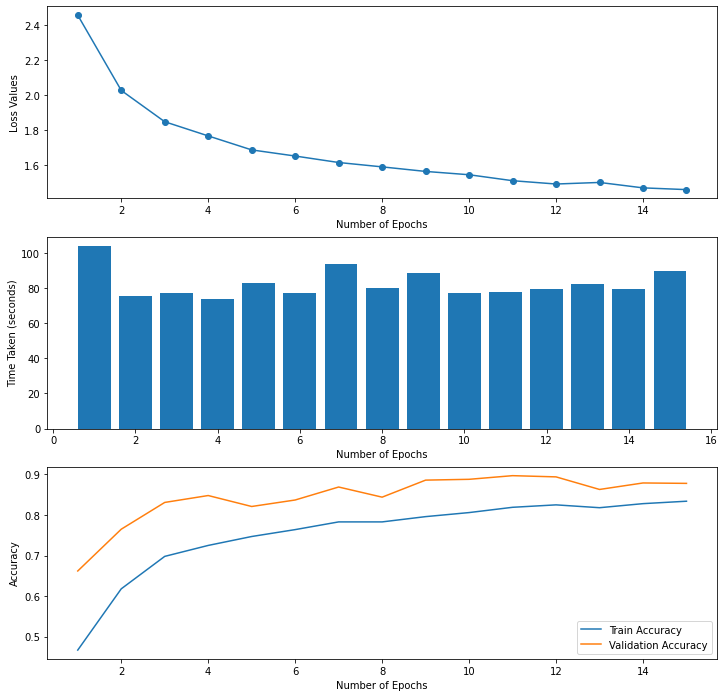

Model1 Finished Training


In [12]:
num_of_epochs = 15
loss_list = []
time_list = []
train_list = []
val_list = []
fig, axs = plt.subplots(3)
fig.set_figheight(12)
fig.set_figwidth(12)

for epoch in range(num_of_epochs):  # loop over the dataset multiple times
    epoch_start_time = time.time()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss = running_loss + loss.item()
        #for accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        correct+= (predicted == labels).sum().item()
        total+=labels.size(0)
    epoch_end_time = time.time()
    avg_running_loss = round(running_loss/i+1,3)
    time_taken = round(epoch_end_time - epoch_start_time,3)
    #plot purpose 
    loss_list.append(avg_running_loss)
    time_list.append(time_taken)
    train_list.append(round(correct/total,3))
    val_list.append(get_accuracy(valloader,net))
    
    # print statistics
    print (f'Epoch [{epoch+1}/{num_of_epochs}], Step [{i+1}/{len(trainloader)}], Time taken:[{time_taken} seconds], Loss: {avg_running_loss:.4f}')
    
x_values = np.arange(1,num_of_epochs+1)
axs[0].plot(x_values,loss_list,marker='o')
axs[0].set_xlabel("Number of Epochs")
axs[0].set_ylabel("Loss Values")
axs[1].bar(x_values,time_list)
axs[1].set_xlabel("Number of Epochs")
axs[1].set_ylabel("Time Taken (seconds)")
axs[2].plot(x_values,train_list , label = 'Train Accuracy')
axs[2].plot(x_values,val_list, label = 'Validation Accuracy')
axs[2].set_xlabel("Number of Epochs")
axs[2].set_ylabel("Accuracy")
axs[2].legend()
plt.show()
print('Model1 Finished Training')

In [13]:
# with drop out layers 
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(9248, 256)
        self.fc2 = nn.Linear(256, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        nn.Dropout(p=0.4)
        x = self.pool(F.relu(self.conv2(x)))
        nn.Dropout(p=0.4)
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model2 = Model2()

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

Epoch [1/15], Step [173/173], Time taken:[79.878 seconds], Loss: 2.4480
Epoch [2/15], Step [173/173], Time taken:[77.391 seconds], Loss: 2.0260
Epoch [3/15], Step [173/173], Time taken:[73.168 seconds], Loss: 1.8620
Epoch [4/15], Step [173/173], Time taken:[72.214 seconds], Loss: 1.7280
Epoch [5/15], Step [173/173], Time taken:[85.487 seconds], Loss: 1.6820
Epoch [6/15], Step [173/173], Time taken:[78.438 seconds], Loss: 1.6590
Epoch [7/15], Step [173/173], Time taken:[80.11 seconds], Loss: 1.6010
Epoch [8/15], Step [173/173], Time taken:[81.95 seconds], Loss: 1.5800
Epoch [9/15], Step [173/173], Time taken:[93.179 seconds], Loss: 1.5450
Epoch [10/15], Step [173/173], Time taken:[81.195 seconds], Loss: 1.5180
Epoch [11/15], Step [173/173], Time taken:[89.983 seconds], Loss: 1.4800
Epoch [12/15], Step [173/173], Time taken:[92.995 seconds], Loss: 1.4650
Epoch [13/15], Step [173/173], Time taken:[82.451 seconds], Loss: 1.4750
Epoch [14/15], Step [173/173], Time taken:[81.818 seconds], Lo

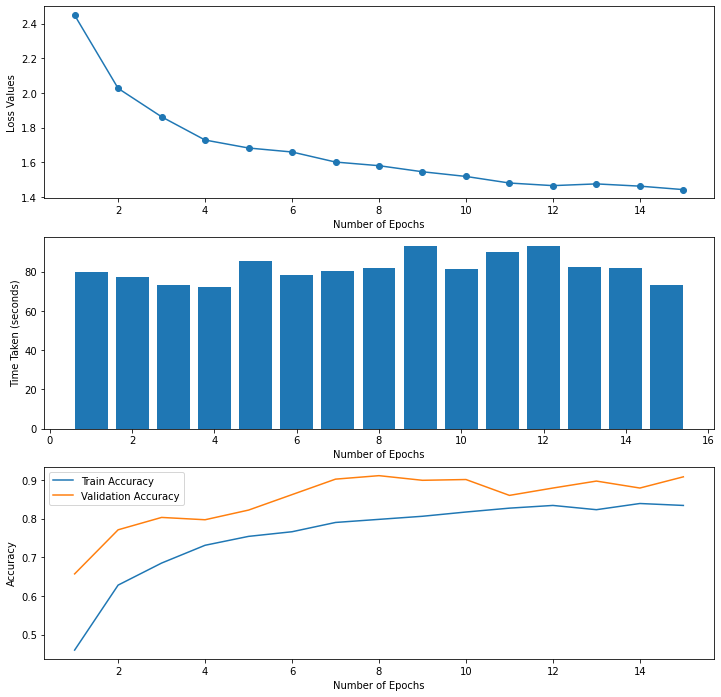

Finished Training Model 2


In [15]:
# Model 2 Training and ploting 
num_of_epochs2 = 15
loss_list2 = []
time_list2 = []
train_list2 = []
val_list2 = []
fig2, axs2 = plt.subplots(3)
fig2.set_figheight(12)
fig2.set_figwidth(12)

for epoch in range(num_of_epochs2):  # loop over the dataset multiple times
    epoch_start_time2 = time.time()
    running_loss2 = 0.0
    correct2 = 0
    total2 = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs data is a list of [inputs, labels]
        inputs2, labels2 = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs2 = model2(inputs2)
        loss2 = criterion(outputs2, labels2)
        loss2.backward()
        optimizer.step()
        running_loss2 = running_loss2 + loss2.item()
        #for accuracy calculation
        _, predicted2 = torch.max(outputs2.data, 1)
        correct2+= (predicted2 == labels2).sum().item()
        total2+=labels2.size(0)
    epoch_end_time2 = time.time()
    avg_running_loss2 = round(running_loss2/i+1,3)
    time_taken2 = round(epoch_end_time2 - epoch_start_time2,3)
    #plot purpose 
    loss_list2.append(avg_running_loss2)
    time_list2.append(time_taken2)
    train_list2.append(round(correct2/total2,3))
    val_list2.append(get_accuracy(valloader,model2))
    
    # print statistics
    print (f'Epoch [{epoch+1}/{num_of_epochs2}], Step [{i+1}/{len(trainloader)}], Time taken:[{time_taken2} seconds], Loss: {avg_running_loss2:.4f}')
    
x_values2 = np.arange(1,num_of_epochs2+1)
axs2[0].plot(x_values2,loss_list2,marker='o')
axs2[0].set_xlabel("Number of Epochs")
axs2[0].set_ylabel("Loss Values")
axs2[1].bar(x_values2,time_list2)
axs2[1].set_xlabel("Number of Epochs")
axs2[1].set_ylabel("Time Taken (seconds)")
axs2[2].plot(x_values2,train_list2 , label = 'Train Accuracy')
axs2[2].plot(x_values2,val_list2, label = 'Validation Accuracy')
axs2[2].set_xlabel("Number of Epochs")
axs2[2].set_ylabel("Accuracy")
axs2[2].legend()
plt.show()
print('Finished Training Model 2')

<h3>Sample Ground Truth & Predicted Ouput</h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


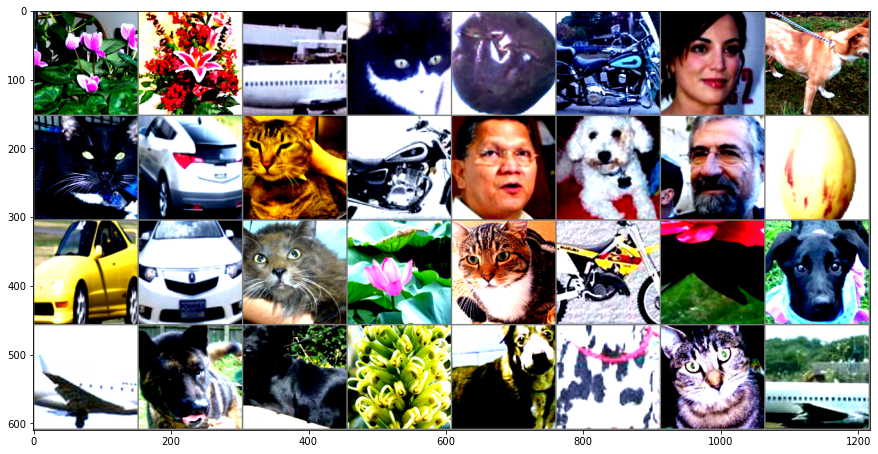

GroundTruth:  Flower Flower Airplane Cat   Fruit Motorbike Person Dog   Cat   Car   Cat   Motorbike Person Dog   Person Fruit Car   Car   Cat   Flower Cat   Motorbike Flower Dog   Airplane Dog   Dog   Flower Dog   Dog   Cat   Airplane


In [16]:
dataiter = iter(valloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [17]:
PATH = './natural_images_net.pth'
torch.save(net.state_dict(), PATH)
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  Flower Flower Airplane Cat   Fruit Motorbike Person Dog   Cat   Car   Flower Motorbike Person Cat   Person Fruit Car   Car   Cat   Flower Cat   Motorbike Flower Dog   Airplane Cat   Cat   Flower Flower Motorbike Cat   Airplane


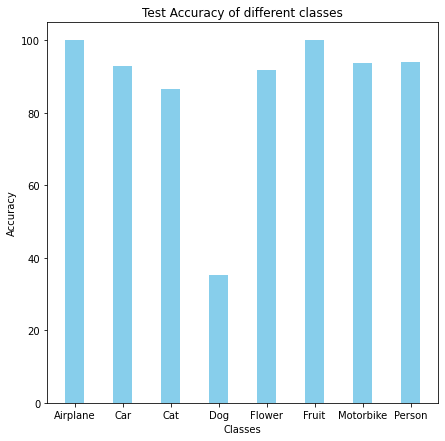

In [18]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
cls_wise_acc=[]
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    cls_wise_acc.append(round(accuracy,2))
fig4 = plt.figure(figsize = (7, 7))
# creating the bar plot
plt.bar(list(classes), cls_wise_acc, color ='skyblue',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Test Accuracy of different classes")
plt.show()

In [19]:
model1_accuracy = get_accuracy(testloader,net)
print(f'''Average test accuracy of the model1 is {model1_accuracy*100}%''')

Average test accuracy of the model1 is 88.1%


In [20]:
model2_accuracy = get_accuracy(testloader,model2)
print(f'''Average test accuracy of the model2 is {model2_accuracy*100}%''')

Average test accuracy of the model2 is 91.7%


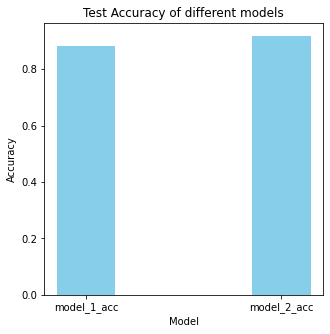

In [21]:
fig3 = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(['model_1_acc','model_2_acc'], [model1_accuracy,model2_accuracy], color ='skyblue',
        width = 0.3)
 
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Test Accuracy of different models")
plt.show()